# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import csv
from scipy import stats

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []

In [4]:
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    print(response) 
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    time.sleep(1)
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
{'coord': {'lon': 22.7882, 'lat': 10.2849}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.56, 'feels_like': 13.64, 'temp_min': 17.56, 'temp_max': 17.56, 'pressure': 1012, 'humidity': 28, 'sea_level': 1012, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 73}, 'clouds': {'all': 77}, 'dt': 1612736959, 'sys': {'country': 'CF', 'sunrise': 1612673452, 'sunset': 1612715710}, 'timezone': 3600, 'id': 240210, 'name': 'Birao', 'cod': 200}
Processing record 1 of set 0 | birao
{'coord': {'lon': 173.7833, 'lat': -35.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.56, 'feels_like': 20.42, 'temp_min': 20.56, 'temp_max': 20.56, 'pressure': 1015, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 53, 'gust'

{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -22.76, 'feels_like': -28.99, 'temp_min': -22.76, 'temp_max': -22.76, 'pressure': 1041, 'humidity': 85, 'sea_level': 1041, 'grnd_level': 1040}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 3}, 'clouds': {'all': 0}, 'dt': 1612736976, 'sys': {'country': 'RU', 'sunrise': 1612813815, 'sunset': 1612841175}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
Processing record 16 of set 0 | lavrentiya
{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -7.66, 'feels_like': -11.78, 'temp_min': -7.66, 'temp_max': -7.66, 'pressure': 1035, 'humidity': 79, 'sea_level': 1035, 'grnd_level': 1035}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 50}, 'clouds': {'all': 2}, 'dt': 1612736873, 'sys': {

{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16, 'feels_like': 14.09, 'temp_min': 16, 'temp_max': 16, 'pressure': 1013, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1612736992, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1612689024, 'sunset': 1612743863}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
Processing record 31 of set 0 | ushuaia
{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.89, 'feels_like': 18.16, 'temp_min': 18.89, 'temp_max': 18.89, 'pressure': 1007, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 113, 'gust': 3.58}, 'clouds': {'all': 100}, 'dt': 1612736882, 'sys': {'type': 3, 'id': 2000217, 'country': 'NZ', 'sunr

{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29, 'feels_like': 30.43, 'temp_min': 29, 'temp_max': 29, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1612736964, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1612715133, 'sunset': 1612761663}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
Processing record 46 of set 0 | avarua
{'coord': {'lon': 101.45, 'lat': 1.6833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.34, 'feels_like': 26.63, 'temp_min': 23.34, 'temp_max': 23.34, 'pressure': 1009, 'humidity': 89, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 71}, 'clouds': {'all': 97}, 'dt': 1612737013, 'sys': {'country': 'ID', 'sunri

{'coord': {'lon': 77.5833, 'lat': 34.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -11.54, 'feels_like': -15.48, 'temp_min': -11.54, 'temp_max': -11.54, 'pressure': 1038, 'humidity': 57, 'sea_level': 1038, 'grnd_level': 669}, 'visibility': 10000, 'wind': {'speed': 0.59, 'deg': 90}, 'clouds': {'all': 4}, 'dt': 1612737031, 'sys': {'country': 'IN', 'sunrise': 1612748494, 'sunset': 1612787173}, 'timezone': 19800, 'id': 1264976, 'name': 'Leh', 'cod': 200}
Processing record 11 of set 1 | leh
{'cod': '404', 'message': 'city not found'}
Processing record 12 of set 1 | lolua
City not found. Skipping...
{'coord': {'lon': -80.8557, 'lat': 33.4918}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11.98, 'feels_like': 8.12, 'temp_min': 11.67, 'temp_max': 12.22, 'pressure': 1017, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 3.09, 'd

{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16, 'feels_like': 15.17, 'temp_min': 16, 'temp_max': 16, 'pressure': 1016, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 320}, 'clouds': {'all': 5}, 'dt': 1612736799, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1612757249, 'sunset': 1612806039}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
Processing record 26 of set 1 | bredasdorp
{'coord': {'lon': 91.3903, 'lat': 53.6039}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -11, 'feels_like': -15.53, 'temp_min': -11, 'temp_max': -11, 'pressure': 1018, 'humidity': 85}, 'visibility': 4400, 'wind': {'speed': 1.82, 'deg': 149}, 'clouds': {'all': 97}, 'dt': 1612737049, 'sys': {'type'

{'coord': {'lon': 112.2051, 'lat': -6.8844}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.83, 'feels_like': 27.57, 'temp_min': 25.83, 'temp_max': 25.83, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.09, 'deg': 275}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1612736921, 'sys': {'country': 'ID', 'sunrise': 1612737270, 'sunset': 1612781777}, 'timezone': 25200, 'id': 8079926, 'name': 'Labuhan', 'cod': 200}
Processing record 44 of set 1 | labuhan
{'coord': {'lon': -41.4361, 'lat': -11.4553}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.7, 'feels_like': 26.23, 'temp_min': 23.7, 'temp_max': 23.7, 'pressure': 1011, 'humidity': 70, 'sea_level': 1011, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 0.31, 'deg': 33}, 'clouds': {'all': 92}, 'dt

{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.89, 'feels_like': 22.52, 'temp_min': 23.89, 'temp_max': 23.89, 'pressure': 1011, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 158, 'gust': 4.47}, 'clouds': {'all': 0}, 'dt': 1612737054, 'sys': {'type': 3, 'id': 2033614, 'country': 'CL', 'sunrise': 1612692505, 'sunset': 1612743032}, 'timezone': -10800, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
Processing record 8 of set 2 | ancud
{'coord': {'lon': -118.0467, 'lat': 33.8464}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.43, 'feels_like': 17.85, 'temp_min': 16.67, 'temp_max': 22.78, 'pressure': 1013, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1612737085, 'sys': {'type': 1, 'id': 5860, 'country': 'US', 'sun

{'coord': {'lon': -2.9333, 'lat': 11.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.39, 'feels_like': 23.04, 'temp_min': 27.39, 'temp_max': 27.39, 'pressure': 1009, 'humidity': 17, 'sea_level': 1009, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 3.41, 'deg': 43}, 'clouds': {'all': 0}, 'dt': 1612737100, 'sys': {'country': 'BF', 'sunrise': 1612679723, 'sunset': 1612721786}, 'timezone': 0, 'id': 2362150, 'name': 'Boromo', 'cod': 200}
Processing record 23 of set 2 | boromo
{'coord': {'lon': 114.0833, 'lat': 71.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -38.4, 'feels_like': -46.4, 'temp_min': -38.4, 'temp_max': -38.4, 'pressure': 1028, 'humidity': 79, 'sea_level': 1028, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 140}, 'clouds': {'all': 31}, 'dt': 1612737101, 'sys': {'count

{'coord': {'lon': 172.8, 'lat': -40.85}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.44, 'feels_like': 21.06, 'temp_min': 19.44, 'temp_max': 19.44, 'pressure': 1015, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 259, 'gust': 2.68}, 'clouds': {'all': 14}, 'dt': 1612737117, 'sys': {'type': 3, 'id': 2002166, 'country': 'NZ', 'sunrise': 1612719866, 'sunset': 1612770094}, 'timezone': 46800, 'id': 2181997, 'name': 'Takaka', 'cod': 200}
Processing record 38 of set 2 | takaka
{'coord': {'lon': 147.1797, 'lat': -9.4431}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 29.15, 'temp_min': 26, 'temp_max': 26, 'pressure': 1008, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1612737118, 'sys': {'type': 1, 'id': 42, 'country': 'PG', 'sunrise':

{'coord': {'lon': -73.3579, 'lat': 41.1415}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -0.71, 'feels_like': -5.23, 'temp_min': -1.11, 'temp_max': 0, 'pressure': 1009, 'humidity': 86}, 'visibility': 3219, 'wind': {'speed': 3.09, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1612736947, 'sys': {'type': 1, 'id': 3409, 'country': 'US', 'sunrise': 1612699066, 'sunset': 1612736249}, 'timezone': -18000, 'id': 4845585, 'name': 'Westport', 'cod': 200}
Processing record 3 of set 3 | westport
{'coord': {'lon': 78.661, 'lat': 54.7021}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -12.58, 'feels_like': -20.48, 'temp_min': -12.58, 'temp_max': -12.58, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.6, 'deg': 20

{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.8, 'feels_like': 27.37, 'temp_min': 24.44, 'temp_max': 27, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'rain': {'1h': 0.4}, 'clouds': {'all': 20}, 'dt': 1612737151, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1612749404, 'sunset': 1612795779}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
Processing record 18 of set 3 | bambous virieux
{'cod': '404', 'message': 'city not found'}
Processing record 19 of set 3 | kerki
City not found. Skipping...
{'coord': {'lon': 114.0683, 'lat': 22.5455}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.16, 'feels_like': 18.89, 'temp_min': 15.56, 'temp_max': 20, 'pressure': 1018, 'humidity': 86, 'sea_level': 1018, 'grnd_le

{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.62, 'feels_like': -44.62, 'temp_min': -35.62, 'temp_max': -35.62, 'pressure': 1016, 'humidity': 85, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 7725, 'wind': {'speed': 7.26, 'deg': 68}, 'clouds': {'all': 90}, 'dt': 1612737170, 'sys': {'country': 'RU', 'sunrise': 1612759542, 'sunset': 1612774702}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
Processing record 35 of set 3 | dikson
{'coord': {'lon': 161.9205, 'lat': -10.4544}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29.37, 'feels_like': 32.28, 'temp_min': 29.37, 'temp_max': 29.37, 'pressure': 1007, 'humidity': 69, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.39, 'deg': 277}, 'clouds': {'all': 26}, 'dt': 1612737

{'coord': {'lon': -35.7353, 'lat': -9.6658}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 27.94, 'temp_min': 26, 'temp_max': 26, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1612737186, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1612686181, 'sunset': 1612731074}, 'timezone': -10800, 'id': 3395981, 'name': 'Maceió', 'cod': 200}
Processing record 50 of set 3 | maceio
{'coord': {'lon': 124.8925, 'lat': -9.1061}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.62, 'feels_like': 28.7, 'temp_min': 24.62, 'temp_max': 24.62, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 289}, 'clouds': {'all': 100}, 'dt': 1612737187, 'sys': {'country': 'ID', 'sunris

{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.06, 'feels_like': 22.06, 'temp_min': 22.06, 'temp_max': 22.06, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 180}, 'rain': {'1h': 0.39}, 'clouds': {'all': 94}, 'dt': 1612737204, 'sys': {'country': 'ZA', 'sunrise': 1612755507, 'sunset': 1612804003}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}
Processing record 15 of set 4 | east london
{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -28.86, 'feels_like': -33.53, 'temp_min': -28.86, 'temp_max': -28.86, 'pressure': 1003, 'humidity': 75, 'sea_level': 1003, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 127}, 'clouds': {'all': 

{'coord': {'lon': -85.0269, 'lat': 35.949}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.59, 'feels_like': -6.6, 'temp_min': -3.33, 'temp_max': -1.67, 'pressure': 1020, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1612737131, 'sys': {'type': 1, 'id': 3713, 'country': 'US', 'sunrise': 1612701319, 'sunset': 1612739597}, 'timezone': -21600, 'id': 4616470, 'name': 'Crossville', 'cod': 200}
Processing record 31 of set 4 | crossville
{'coord': {'lon': -87.1764, 'lat': 37.2711}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -2.07, 'feels_like': -6.87, 'temp_min': -2.78, 'temp_max': -1.11, 'pressure': 1023, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 350}, 'clouds': {'all': 1}, 'dt': 1612737223, 'sys': {'type': 1, 'id': 4816, 'country': 'US', 'sunris

{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 28.91, 'temp_min': 27, 'temp_max': 27, 'pressure': 1007, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1612737239, 'sys': {'type': 1, 'id': 9495, 'country': 'AU', 'sunrise': 1612729749, 'sunset': 1612776196}, 'timezone': 36000, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
Processing record 47 of set 4 | mount isa
{'coord': {'lon': -81.7832, 'lat': 32.4488}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.15, 'feels_like': 6.55, 'temp_min': 9, 'temp_max': 11, 'pressure': 1018, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 12}, 'clouds': {'all': 1}, 'dt': 1612737181, 'sys': {'type': 1, 'id': 6004, 'country': 'US', 'sunrise': 1612700214, 'sunset

{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -3, 'feels_like': -12.02, 'temp_min': -3, 'temp_max': -3, 'pressure': 1033, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1612736981, 'sys': {'type': 1, 'id': 81, 'country': 'GL', 'sunrise': 1612695712, 'sunset': 1612722456}, 'timezone': -10800, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
Processing record 11 of set 5 | tasiilaq
{'coord': {'lon': -72.4167, 'lat': -35.3333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.86, 'feels_like': 15.56, 'temp_min': 16.86, 'temp_max': 16.86, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.19, 'deg': 230}, 'clouds': {'all': 2}, 'dt': 1612737257, 'sys': {'country': 'CL', 'sunrise':

{'coord': {'lon': 72.642, 'lat': 10.5669}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.01, 'feels_like': 28.47, 'temp_min': 27.01, 'temp_max': 27.01, 'pressure': 1010, 'humidity': 71, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.11, 'deg': 7}, 'clouds': {'all': 16}, 'dt': 1612737272, 'sys': {'country': 'IN', 'sunrise': 1612747896, 'sunset': 1612790142}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
Processing record 26 of set 5 | kavaratti
{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.25, 'feels_like': 33.18, 'temp_min': 29.25, 'temp_max': 29.25, 'pressure': 1008, 'humidity': 69, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.84, 'deg': 335}, 'clouds': {'all': 98}, 'dt': 1612737273, 

{'coord': {'lon': -56.0861, 'lat': -9.8756}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.66, 'feels_like': 25.49, 'temp_min': 21.66, 'temp_max': 21.66, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 0.62, 'deg': 322}, 'clouds': {'all': 100}, 'dt': 1612737289, 'sys': {'country': 'BR', 'sunrise': 1612691052, 'sunset': 1612735972}, 'timezone': -14400, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
Processing record 42 of set 5 | alta floresta
{'coord': {'lon': 25.9704, 'lat': 70.9821}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -4, 'feels_like': -16.97, 'temp_min': -4, 'temp_max': -4, 'pressure': 1022, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 14.4, 'deg': 340}, 'snow': {'1h': 0.19}, 'clouds': {'all': 40}, 'dt': 1612737291, 'sys': {'type': 

{'coord': {'lon': 106.2708, 'lat': 45.7625}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -10.69, 'feels_like': -16.93, 'temp_min': -10.69, 'temp_max': -10.69, 'pressure': 1031, 'humidity': 83, 'sea_level': 1031, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 4.26, 'deg': 256}, 'clouds': {'all': 0}, 'dt': 1612737306, 'sys': {'country': 'MN', 'sunrise': 1612742880, 'sunset': 1612779016}, 'timezone': 28800, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
Processing record 6 of set 6 | mandalgovi
{'cod': '404', 'message': 'city not found'}
Processing record 7 of set 6 | ituni
City not found. Skipping...
{'coord': {'lon': -158.0858, 'lat': 21.3469}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25.27, 'feels_like': 23.09, 'temp_min': 23, 'temp_max': 26, 'pressure': 1017, 'humidity': 41}, 'visibility': 10000, 'wind': {'spee

{'coord': {'lon': -52, 'lat': 1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.92, 'feels_like': 26.67, 'temp_min': 22.92, 'temp_max': 22.92, 'pressure': 1011, 'humidity': 97, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 7578, 'wind': {'speed': 1.68, 'deg': 22}, 'clouds': {'all': 100}, 'dt': 1612737217, 'sys': {'country': 'BR', 'sunrise': 1612690790, 'sunset': 1612734272}, 'timezone': -10800, 'id': 3407762, 'name': 'Amapá', 'cod': 200}
Processing record 21 of set 6 | amapa
{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -9.58, 'feels_like': -15.32, 'temp_min': -9.58, 'temp_max': -9.58, 'pressure': 1004, 'humidity': 85, 'sea_level': 1004, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 301}, 'clouds': {'all': 7}, 'dt': 1612737324, 'sys': {'country': '

{'coord': {'lon': -53.1147, 'lat': 48.6499}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -2, 'feels_like': -8.78, 'temp_min': -3, 'temp_max': -0.56, 'pressure': 1011, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1612737339, 'sys': {'type': 1, 'id': 719, 'country': 'CA', 'sunrise': 1612695185, 'sunset': 1612730412}, 'timezone': -12600, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
Processing record 36 of set 6 | bonavista
{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.55, 'feels_like': 24.3, 'temp_min': 22, 'temp_max': 23, 'pressure': 1013, 'humidity': 88}, 'visibility': 9000, 'wind': {'speed': 3.09, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1612737340, 'sys': {'type': 1, 'id': 8326, 'country': 'BR', 'sunrise': 1612686724,

{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.46, 'feels_like': -4.78, 'temp_min': 2.46, 'temp_max': 2.46, 'pressure': 1029, 'humidity': 89, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 450, 'wind': {'speed': 7.69, 'deg': 86}, 'clouds': {'all': 100}, 'dt': 1612737357, 'sys': {'country': 'IS', 'sunrise': 1612689780, 'sunset': 1612717622}, 'timezone': 0, 'id': 2630299, 'name': 'Hofn', 'cod': 200}
Processing record 1 of set 7 | hofn
{'coord': {'lon': 37.8933, 'lat': 55.2677}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -14, 'feels_like': -20.97, 'temp_min': -14, 'temp_max': -14, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 340}, 'snow': {'1h': 0.32}, 'clouds': {'all': 75}, 'dt': 1612737358, 'sys': {'type': 1, 'id': 9021, 'country': 'RU

{'coord': {'lon': 69.9, 'lat': 60.05}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -16.25, 'feels_like': -23.52, 'temp_min': -16.25, 'temp_max': -16.25, 'pressure': 989, 'humidity': 92, 'sea_level': 989, 'grnd_level': 985}, 'visibility': 507, 'wind': {'speed': 5.42, 'deg': 212}, 'snow': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1612737374, 'sys': {'country': 'RU', 'sunrise': 1612754259, 'sunset': 1612785096}, 'timezone': 18000, 'id': 1506268, 'name': 'Gornopravdinsk', 'cod': 200}
Processing record 16 of set 7 | gornopravdinsk
{'coord': {'lon': 153.4, 'lat': -28.3167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.62, 'feels_like': 25.92, 'temp_min': 24, 'temp_max': 27.22, 'pressure': 1009, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1612737375, 'sys': {'type': 1, 

{'coord': {'lon': 24.15, 'lat': 35.5333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': 11.38, 'temp_min': 14, 'temp_max': 14, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.65, 'deg': 173}, 'clouds': {'all': 40}, 'dt': 1612737393, 'sys': {'type': 1, 'id': 6643, 'country': 'GR', 'sunrise': 1612761438, 'sunset': 1612799878}, 'timezone': 7200, 'id': 256660, 'name': 'Mouzourás', 'cod': 200}
Processing record 34 of set 7 | mouzouras
{'coord': {'lon': 27.8492, 'lat': 71.0357}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -4, 'feels_like': -16.97, 'temp_min': -4, 'temp_max': -4, 'pressure': 1022, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 14.4, 'deg': 340}, 'snow': {'1h': 0.1}, 'clouds': {'all': 40}, 'dt': 1612737394, 'sys': {'type': 1, 'id': 1633, 'country': 'NO',

{'coord': {'lon': -23.5087, 'lat': 14.9215}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 20, 'feels_like': 14.09, 'temp_min': 20, 'temp_max': 20, 'pressure': 1017, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 9.77, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1612737411, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1612684876, 'sunset': 1612726509}, 'timezone': -3600, 'id': 3374333, 'name': 'Praia', 'cod': 200}
Processing record 50 of set 7 | praia
{'coord': {'lon': 41.9211, 'lat': 64.2956}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -24, 'feels_like': -28.48, 'temp_min': -24, 'temp_max': -24, 'pressure': 1012, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1612737412, 'sys': {'type': 1, 'id': 8922, 'country': 'RU', 'sunrise': 1612762321, 'sunset

{'coord': {'lon': 113.6, 'lat': 54.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -21.79, 'feels_like': -26.13, 'temp_min': -21.79, 'temp_max': -21.79, 'pressure': 1030, 'humidity': 85, 'sea_level': 1030, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 0.91, 'deg': 311}, 'clouds': {'all': 100}, 'dt': 1612737428, 'sys': {'country': 'RU', 'sunrise': 1612742500, 'sunset': 1612775878}, 'timezone': 28800, 'id': 2027244, 'name': 'Bagdarin', 'cod': 200}
Processing record 14 of set 8 | bagdarin
{'coord': {'lon': 57.7625, 'lat': -20.2078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.65, 'feels_like': 27.15, 'temp_min': 24.44, 'temp_max': 27, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'rain': {'1h': 0.17}, 'clouds': {'all': 20}, 'dt': 1612737429, 'sys': {'type': 1, 'id

{'coord': {'lon': 103.8405, 'lat': 2.4312}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 29.68, 'temp_min': 26, 'temp_max': 26, 'pressure': 1009, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 300}, 'clouds': {'all': 79}, 'dt': 1612737367, 'sys': {'type': 1, 'id': 9425, 'country': 'MY', 'sunrise': 1612739881, 'sunset': 1612783181}, 'timezone': 28800, 'id': 1732826, 'name': 'Mersing', 'cod': 200}
Processing record 30 of set 8 | mersing
{'coord': {'lon': -69.8474, 'lat': 19.3832}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 30.71, 'temp_min': 27, 'temp_max': 27, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1612737446, 'sys': {'type': 1, 'id': 7047, 'country': 'DO', 'sunrise': 1612696309, 'sunse

{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.16, 'feels_like': 32.38, 'temp_min': 29.16, 'temp_max': 29.16, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 2.99, 'deg': 305}, 'clouds': {'all': 24}, 'dt': 1612737463, 'sys': {'country': 'SB', 'sunrise': 1612725504, 'sunset': 1612770264}, 'timezone': 39600, 'id': 2109701, 'name': 'Auki', 'cod': 200}
Processing record 46 of set 8 | auki
{'coord': {'lon': 115.3833, 'lat': -2.5833}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.82, 'feels_like': 28.42, 'temp_min': 23.82, 'temp_max': 23.82, 'pressure': 1009, 'humidity': 93, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.62, 'deg': 108}, 'rain': {'1h': 4.211}, 'clouds': {'all': 99},

{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.3, 'feels_like': 28.21, 'temp_min': 25.3, 'temp_max': 25.3, 'pressure': 1006, 'humidity': 81, 'sea_level': 1006, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 2.4, 'deg': 265}, 'clouds': {'all': 88}, 'dt': 1612737478, 'sys': {'country': 'NC', 'sunrise': 1612722881, 'sunset': 1612769631}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
Processing record 9 of set 9 | vao
{'coord': {'lon': 102.2833, 'lat': 6.0333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.95, 'feels_like': 28.51, 'temp_min': 23.89, 'temp_max': 24, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 209}, 'clouds': {'all': 20}, 'dt': 1612737242, 'sys': {'type': 1, 'id': 9431, 'country': 'MY', 'sunrise'

{'coord': {'lon': 39.6049, 'lat': 43.7129}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.95, 'feels_like': 5.2, 'temp_min': 8.89, 'temp_max': 9, 'pressure': 1017, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1612737495, 'sys': {'type': 1, 'id': 8972, 'country': 'RU', 'sunrise': 1612758606, 'sunset': 1612795291}, 'timezone': 10800, 'id': 823676, 'name': 'Gornoye Loo', 'cod': 200}
Processing record 24 of set 9 | gornoye loo
{'coord': {'lon': 44.9661, 'lat': 34.6959}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.99, 'feels_like': 10.94, 'temp_min': 11.99, 'temp_max': 11.99, 'pressure': 1021, 'humidity': 70, 'sea_level': 1021, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 0.4, 'deg': 33}, 'clouds': {'all': 0}, 'dt': 1612737496, 'sys': {'country': 'IQ', 'sunris

{'coord': {'lon': 40.5178, 'lat': -12.974}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.84, 'feels_like': 31.74, 'temp_min': 26.67, 'temp_max': 27, 'pressure': 1009, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1612737513, 'sys': {'type': 1, 'id': 2206, 'country': 'MZ', 'sunrise': 1612754070, 'sunset': 1612799388}, 'timezone': 7200, 'id': 1028918, 'name': 'Pemba', 'cod': 200}
Processing record 41 of set 9 | pemba
{'cod': '404', 'message': 'city not found'}
Processing record 42 of set 9 | dzhusaly
City not found. Skipping...
{'coord': {'lon': -51.7216, 'lat': 64.1835}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -1.06, 'feels_like': -7.86, 'temp_min': -1.11, 'temp_max': -1, 'pressure': 1016, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 80}, 

{'coord': {'lon': -54.3833, 'lat': 4.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.18, 'feels_like': 27.18, 'temp_min': 23.18, 'temp_max': 23.18, 'pressure': 1011, 'humidity': 96, 'sea_level': 1011, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 58}, 'rain': {'1h': 0.316}, 'clouds': {'all': 100}, 'dt': 1612737530, 'sys': {'country': 'GF', 'sunrise': 1612691573, 'sunset': 1612734633}, 'timezone': -10800, 'id': 3381538, 'name': 'Grand-Santi', 'cod': 200}
Processing record 5 of set 10 | grand-santi
{'coord': {'lon': 54.1938, 'lat': 51.8763}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.26, 'feels_like': -31.04, 'temp_min': -23.26, 'temp_max': -23.26, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 986}, 'visibility': 3401, 'wind': {'speed': 5.8, 'deg': 264}, 'clouds': {'all

{'coord': {'lon': 36.5372, 'lat': -14.8031}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.23, 'feels_like': 24.54, 'temp_min': 21.23, 'temp_max': 21.23, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 943}, 'visibility': 10000, 'wind': {'speed': 0.83, 'deg': 92}, 'clouds': {'all': 100}, 'dt': 1612737546, 'sys': {'country': 'MZ', 'sunrise': 1612754899, 'sunset': 1612800470}, 'timezone': 7200, 'id': 1047660, 'name': 'Cuamba', 'cod': 200}
Processing record 20 of set 10 | cuamba
{'coord': {'lon': 16.9333, 'lat': -12.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.29, 'feels_like': 15.77, 'temp_min': 16.29, 'temp_max': 16.29, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 830}, 'visibility': 10000, 'wind': {'speed': 2.78, 'deg': 281}, 'clouds': {'all': 100}, 'dt': 1612737547,

{'coord': {'lon': 10.7167, 'lat': 47.4833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0.37, 'feels_like': -2.79, 'temp_min': 0, 'temp_max': 0.56, 'pressure': 998, 'humidity': 94}, 'visibility': 901, 'wind': {'speed': 1.58, 'deg': 283}, 'snow': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1612737563, 'sys': {'type': 3, 'id': 20910, 'country': 'AT', 'sunrise': 1612679711, 'sunset': 1612715246}, 'timezone': 3600, 'id': 2767511, 'name': 'Reutte', 'cod': 200}
Processing record 35 of set 10 | reutte
{'coord': {'lon': 141.3028, 'lat': -2.6741}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.03, 'feels_like': 30.73, 'temp_min': 27.03, 'temp_max': 27.03, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.09, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1612737564, 'sys':

{'coord': {'lon': 24.1833, 'lat': -7.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.31, 'feels_like': 21.6, 'temp_min': 19.31, 'temp_max': 19.31, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 1.02, 'deg': 292}, 'clouds': {'all': 98}, 'dt': 1612737579, 'sys': {'country': 'CD', 'sunrise': 1612758354, 'sunset': 1612802946}, 'timezone': 7200, 'id': 214389, 'name': 'Kaniama', 'cod': 200}
Processing record 50 of set 10 | kaniama
{'cod': '404', 'message': 'city not found'}
Processing record 0 of set 11 | tabiauea
City not found. Skipping...
{'coord': {'lon': 116.15, 'lat': -33.3667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.67, 'feels_like': 16.85, 'temp_min': 16.67, 'temp_max': 16.67, 'pressure': 995, 'humidity': 92}, 'visibility': 10000, 'wind'

{'coord': {'lon': 80.3167, 'lat': 13.2167}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 22, 'feels_like': 24.94, 'temp_min': 22, 'temp_max': 22, 'pressure': 1013, 'humidity': 88}, 'visibility': 4000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1612737537, 'sys': {'type': 1, 'id': 9218, 'country': 'IN', 'sunrise': 1612746231, 'sunset': 1612788124}, 'timezone': 19800, 'id': 1267433, 'name': 'Kattivākkam', 'cod': 200}
Processing record 14 of set 11 | kattivakkam
{'coord': {'lon': -67.9239, 'lat': 3.8653}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.95, 'feels_like': 30.21, 'temp_min': 24.95, 'temp_max': 24.95, 'pressure': 1007, 'humidity': 92, 'sea_level': 1007, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 0.43, 'deg': 288}, 'clouds': {'all': 100}, 'dt': 1612737528, 'sys': {'country': 'CO', 'sun

{'coord': {'lon': 14.3, 'lat': 6.5167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.55, 'feels_like': 14.55, 'temp_min': 17.55, 'temp_max': 17.55, 'pressure': 1011, 'humidity': 29, 'sea_level': 1011, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 357}, 'clouds': {'all': 87}, 'dt': 1612737612, 'sys': {'country': 'CM', 'sunrise': 1612675239, 'sunset': 1612717998}, 'timezone': 3600, 'id': 2227402, 'name': 'Meïganga', 'cod': 200}
Processing record 29 of set 11 | meiganga
{'coord': {'lon': -124.0198, 'lat': 54.0166}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -15.51, 'feels_like': -19.39, 'temp_min': -15.51, 'temp_max': -15.51, 'pressure': 1025, 'humidity': 89, 'sea_level': 1025, 'grnd_level': 943}, 'visibility': 8954, 'wind': {'speed': 0.59, 'deg': 334}, 'clouds': {'all': 99}, 'dt': 161273761

{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.31, 'feels_like': 17.68, 'temp_min': 21.31, 'temp_max': 21.31, 'pressure': 1009, 'humidity': 31, 'sea_level': 1009, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 3.16, 'deg': 258}, 'clouds': {'all': 82}, 'dt': 1612737629, 'sys': {'country': 'NA', 'sunrise': 1612760117, 'sunset': 1612806148}, 'timezone': 7200, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}
Processing record 44 of set 11 | opuwo
{'cod': '404', 'message': 'city not found'}
Processing record 45 of set 11 | addi ugri
City not found. Skipping...
{'coord': {'lon': 16.2333, 'lat': -2.1667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.25, 'feels_like': 26.62, 'temp_min': 23.25, 'temp_max': 23.25, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 975}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
                "city": cities,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": Humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp_max,
                "Wind Speed": wind_speed
                }
weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,birao,77.0,CF,1.612737e+09,28.0,10.2849,22.7882,17.56,2.53
1,kaeo,32.0,NZ,1.612737e+09,76.0,-35.1000,173.7833,20.56,3.13
2,attawapiskat,24.0,PF,1.612737e+09,74.0,-9.8000,-139.0333,26.46,9.33
3,atuona,25.0,AU,1.612737e+09,85.0,-25.2986,152.8535,27.22,2.24
4,hervey bay,85.0,RU,1.612737e+09,94.0,68.0531,39.5131,-14.28,5.01


In [6]:
# Save dataframe to a new CSV file
weather_data.to_csv("city_weather.csv",                
                  encoding="utf-8", index=False, header=True)
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,557.000000,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000
mean,51.034111,1.612737e+09,72.660682,19.792124,18.741192,9.734758,3.856912
std,38.548492,2.135089e+02,19.902770,33.448391,91.208997,18.212730,2.750479
min,0.000000,1.612737e+09,7.000000,-54.800000,-179.166700,-38.400000,0.170000
25%,12.000000,1.612737e+09,65.000000,-8.345000,-63.057800,-3.000000,1.790000
50%,50.000000,1.612737e+09,77.000000,21.483300,21.100500,17.000000,3.170000
75%,90.000000,1.612737e+09,87.000000,49.133400,101.712800,24.630000,5.140000
max,100.000000,1.612738e+09,100.000000,78.218600,179.316700,33.000000,19.030000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

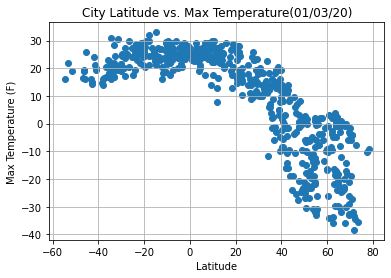

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

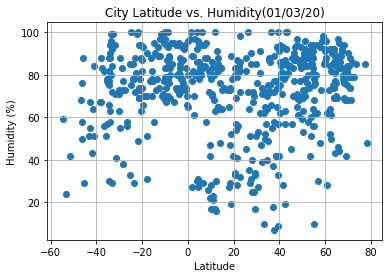

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

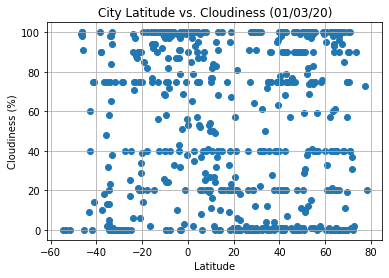

In [11]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

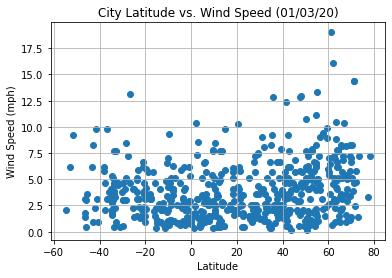

In [12]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8480941501823926


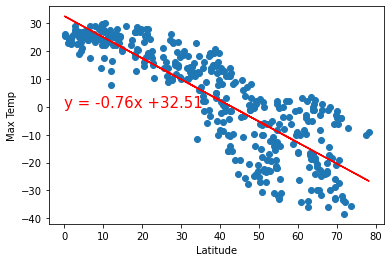

In [17]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5586094830688741


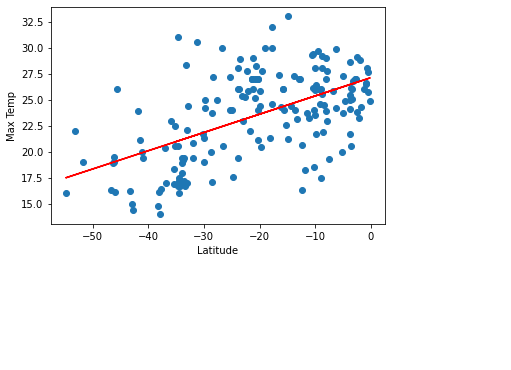

In [18]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1953277548922559


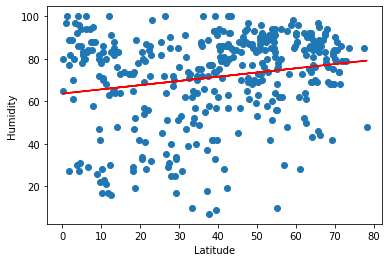

In [19]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4014311569267105


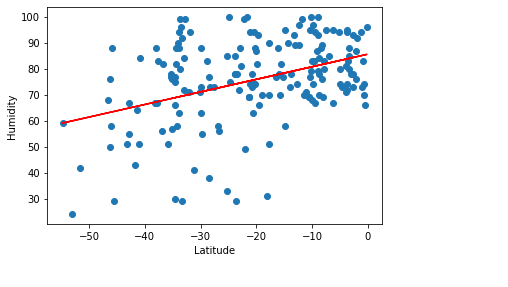

In [20]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06332098383947136


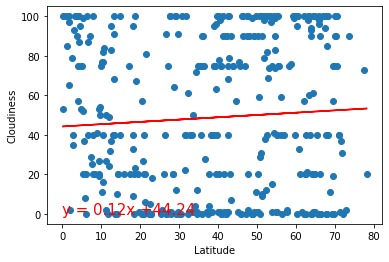

In [21]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2904666163188874


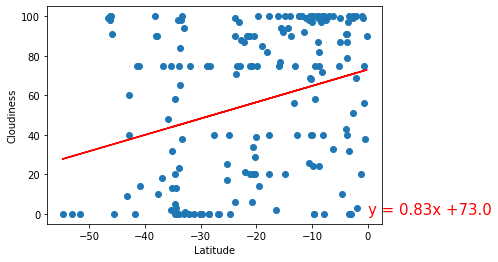

In [22]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2614922378801211


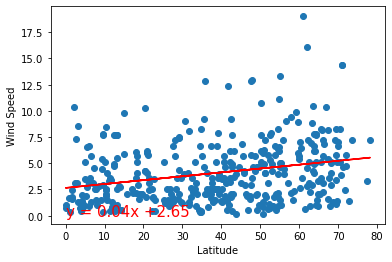

In [23]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20607144554578669


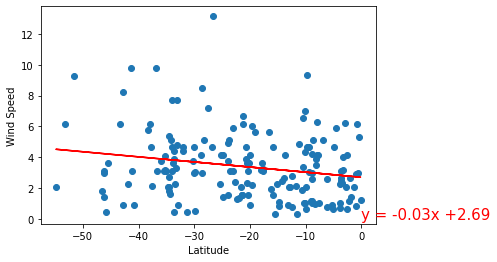

In [24]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

In [ ]:
Observation 1: higher the latitude, lower the Temperature in Northern Hemisphere.

Observation 2: the cloudness does not show relationship with latitude.

Observation 3: the wind speed usually between 0 to 10 mph, some cities in Northern Hemisphere may occur higher wind speed.